In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [74]:
def get_golden_ratio():
    golden_ratio = (1 + np.sqrt(5)) /2
    return golden_ratio

def get_a_from_b(b):
    golden_ratio = get_golden_ratio()
    return b * golden_ratio

def get_b_from_a(a):
    golden_ratio = get_golden_ratio()
    return a / golden_ratio

def get_a_random(max_level, size=1):
    bs = np.arange(1,max_level)
    b = np.random.choice(bs, size)
    a = get_a_from_b(b)
    return a

In [76]:
def get_peg_ids():
    return ['A', 'B', 'C', 'D', 'E', 'F', 'G']

def get_peg_counts():
    return [4, 4, 4, 4, 8, 8, 8]

def get_peg_lengths():
    return [24, 13, 14, 20, 15, 8, 19]

def get_peg_diameters():
    return [4, 4, 4, 4, 4, 4, 4]

def get_peg_radii():
    diameters = get_peg_diameters()
    radii = list(np.asarray(diameters) / 2)
    return radii

def get_peg_areas():
    radii = get_peg_radii()
    areas = 2 * np.pi * (np.asarray(radii)**2)
    areas = list(areas)
    return areas

def get_total_area():
    areas = get_peg_areas()
    counts = get_peg_counts()
    total_area = np.sum(np.dot(areas, counts))
    return total_area

def get_total_count():
    counts = get_peg_counts()
    total_count = sum(counts)
    return total_count

def get_all_peg_lengths():
    counts = get_peg_counts()
    lengths = get_peg_lengths()
    all_peg_lengths = []
    for i,count in enumerate(counts):
        all_peg_lengths.extend([lengths[i]] * count)
    return all_peg_lengths

def get_all_peg_areas():
    counts = get_peg_counts()
    areas = get_peg_areas()
    all_peg_areas = []
    for i,count in enumerate(counts):
        all_peg_areas.extend([areas[i]] * count)
    return all_peg_areas

def test_get_pegs():
    ids = get_peg_ids()
    counts = get_peg_counts()
    lengths = get_peg_lengths()
    diameters = get_peg_diameters()
    radii = get_peg_radii()
    areas = get_peg_areas()
    assert len(ids) == len(counts)
    assert len(counts) == len(lengths)
    assert len(lengths) == len(diameters)
    assert len(diameters) == len(radii)
    assert len(areas) == len(radii)
    
    
    
def get_peg_dict():
    peg_dict = dict()
    ids = get_peg_ids()
    counts = get_peg_counts()
    lengths = get_peg_lengths()
    radii = get_peg_radii()
    diameters = get_peg_diameters()
    areas = get_peg_areas()
    total_area = get_total_area()
    total_count = get_total_count()
    all_peg_lengths = get_all_peg_lengths()
    peg_dict['ids'] = ids
    peg_dict['counts'] = counts
    peg_dict['lengths'] = lengths
    peg_dict['radii'] = radii
    peg_dict['diameters'] = diameters
    peg_dict['areas'] = areas
    peg_dict['total_area'] = total_area
    peg_dict['total_count'] = total_count
    peg_dict['all_peg_lengths'] = all_peg_lengths
    return peg_dict


test_get_pegs()

In [168]:
# Generally useful fibonacci sequence functions

def a_plus_b_to_a(a_plus_b):
    golden_ratio = get_golden_ratio()
    a = golden_ratio * a_plus_b / (golden_ratio + 1)
    return a

def a_plus_b_to_b(a_plus_b):
    golden_ratio = get_golden_ratio()
    a = a_plus_b_to_a(a_plus_b)
    b = a_plus_b - a
    return b

def get_fibonacci_sequence(n):
    assert n > 2
    x = [1, 1]
    i = 2
    while len(x) < n: 
        x.append(x[i-1] + x[i-2])
        i += 1
    return x

def get_fibonacci_area_sequence(n):
    fibonacci_sequence = get_fibonacci_sequence(n)
    fibonacci_area_sequence = [x**2 for x in fibonacci_sequence]
    return fibonacci_area_sequence

def get_rapstine_sequence(n):
    fibonacci_area_sequence = get_fibonacci_area_sequence(n)
    rapstine_sequence = np.cumsum(fibonacci_area_sequence)
    return rapstine_sequence

In [215]:
# compute panel dimensions from fibonacci sequence areas
def total_count_to_panel_width_and_height(total_count):
    fibonacci_sequence = get_fibonacci_sequence(max_width)
    fibonacci_area_sequence = get_fibonacci_area_sequence(max_width)
    rapstine_sequence = get_rapstine_sequence(max_width)
    i = np.argwhere(rapstine_sequence <= a_plus_b)[-1,0]
    a = fibonacci_sequence[i]
    b = fibonacci_sequence[i-1]
    width = a + b
    height = a
    assert width * height == a_plus_b
    assert np.sum(fibonacci_area_sequence[0:i+1]) == a_plus_b
    return width, height

In [196]:
# initialize dictionary of peg pieces 
peg_dict = get_peg_dict()

In [243]:
# construct visually pleasing panel dimensions
panel_width, panel_height = total_count_to_panel_width_and_height(peg_dict['total_count'])
panel = np.random.permutation(peg_dict['all_peg_lengths'])
panel = panel.reshape((panel_height, panel_width))

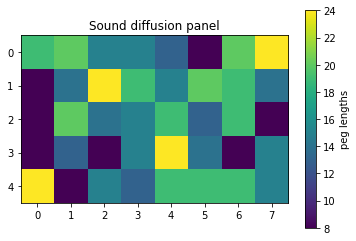

In [245]:
# preview current panel with colors corresponding to peg lengths
plt.imshow(panel)
plt.title('Sound diffusion panel')
plt.colorbar(label='peg lengths')
plt.show()